# Schlogl's model

This example shows how the model representing Schlogl's system of chemical reactions can be used ([Schlogl, 1972](https://link.springer.com/content/pdf/10.1007/BF01379769.pdf)).
This model describes the stochastic process made of four chemical reactions, two of them being the reverse of another, that take place on a single molecule type.
Given an initial concentration of the substance, $n_0$, the process can be described by the following equations:
   $$2A \xrightarrow{k_1} 3A$$
   $$3A \xrightarrow{k_2} 2A$$
   $$\emptyset \xrightarrow{k_3} A$$
   $$A \xrightarrow{k_4} \emptyset$$

The model is simulated according to the Gillespie stochastic simulation algorithm (Gillespie, 1976).

In [2]:
import sys
print(sys.executable)
print("started")
!{'D:\\"Part B"\\python\python.exe'} -m pip install --upgrade git+https://github.com/pints-team/pints.git@additional-stochastic-models
print("done")

D:\Part B\python\python.exe
started
  Cloning https://github.com/pints-team/pints.git (to revision additional-stochastic-models) to c:\users\victor\appdata\local\temp\pip-req-build-s9fa4com
  Running setup.py install for pints: started
    Running setup.py install for pints: finished with status 'done'
done


  Running command git clone -q https://github.com/pints-team/pints.git 'C:\Users\Victor\AppData\Local\Temp\pip-req-build-s9fa4com'
  Running command git checkout -b additional-stochastic-models --track origin/additional-stochastic-models
  Branch 'additional-stochastic-models' set up to track remote branch 'additional-stochastic-models' from 'origin'.
  Switched to a new branch 'additional-stochastic-models'
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pints
import pints.toy as toy
import pints.toy.stochastic

Specify the initial concentration, and select time points at which to record concentration values, and rate constant value (k):

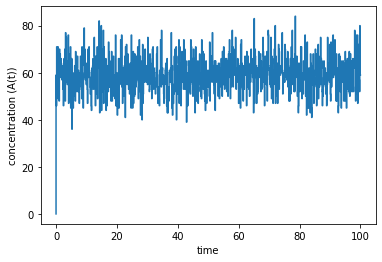

In [13]:
n_0 = 0
model = toy.stochastic.SchloglModel(n_0)

times = np.linspace(0, 100, 1000)
k = model.suggested_parameters()

values = model.simulate(k, times)

plt.step(times, values)
plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.show()

Given the stochastic nature of this model, every iteration returns a different result. However, we can compute the stochastic mean $M(t)$ which gives the average number of molecules of $A$ at time $t$. This function can be described by the following ODE (Erban et al., 2007): $ \frac{\text{d}M}{\text{d}t} = -k_1 M + k_2 $.

We will plot the ODE solution, and compare it to 10 stochastic simulations to show that the stochastic simulation average to the desired function.


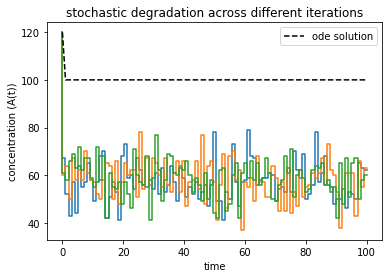

In [12]:
def pend(y, t):
    dydt = [-k[1] * (y[0] ** 3) + k[0] * (y[0] ** 2) - k[3] * y[0] + k[2]]
    return dydt

x_0 = [0]
times = np.linspace(0, 100, 100)

from scipy.integrate import odeint
sol = odeint(pend, x_0, times)

for i in range(3):
    values = model.simulate(k, times)
    plt.step(times, values)
    
plt.title('stochastic degradation across different iterations')
plt.xlabel('time')
plt.ylabel('concentration (A(t))')
plt.plot(times, sol,'--', color='black', label='ode solution')
plt.legend()
plt.show()